# 19기 Clustering 정규세션 과제

## Clustering 해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [49]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [51]:
df.shape

(200, 5)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
df.drop(["CustomerID"],axis = 1,inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [54]:
df.describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# EDA

Purpose of the customer segmentation concepts

As a supermarket owner, have some basic data about customers like customer ID, AGE, gender, annual income and spending score.

Spending score: Assigned to customers based on customer behaviors... 

In [55]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [56]:
num_cols = df.columns.drop('Gender')
num_cols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

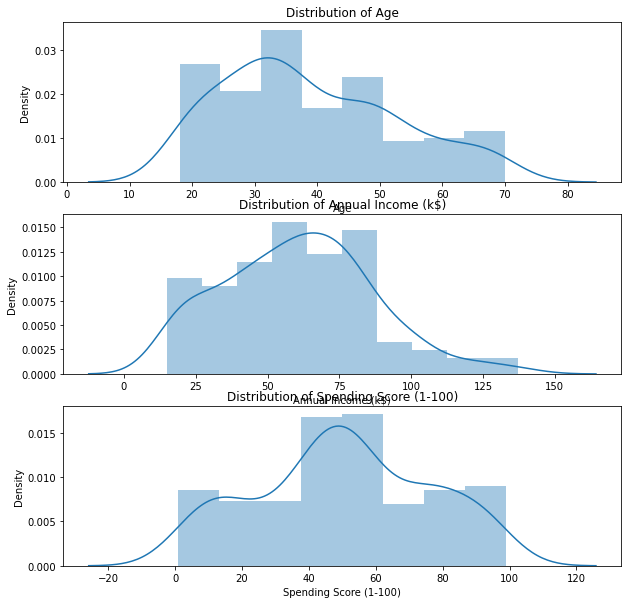

In [57]:
import matplotlib.pyplot as plt
i=0
plt.figure(1, figsize=(10,10))
for col in num_cols:
    i+=1
    plt.subplot(3,1,i)
    sns.distplot(df[col])
    plt.title('Distribution of {}'.format(col))
plt.show()


In [58]:
df['Age'].skew()

0.48556885096681657

In [59]:
df['Annual Income (k$)'].skew()

0.3218425498619055

In [60]:
df['Spending Score (1-100)'].skew()

-0.047220201374263374

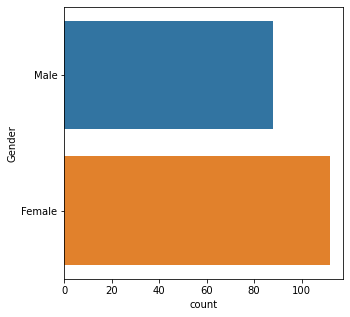

In [61]:
plt.figure(1,figsize=(5,5))
sns.countplot(y='Gender',data=df)
plt.show()

In [62]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


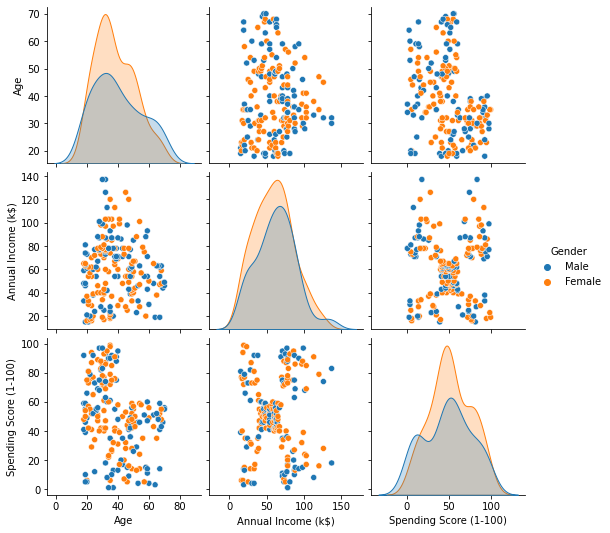

In [63]:
sns.pairplot(df, hue='Gender') #성별에 따른 분포도 확인
plt.show()



범주형변수 gender는 엄청 섞여있기에 customer를 직접적으로 segmentation하기에는 부적합!

In [64]:
df = df.drop(columns='Gender')

In [65]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


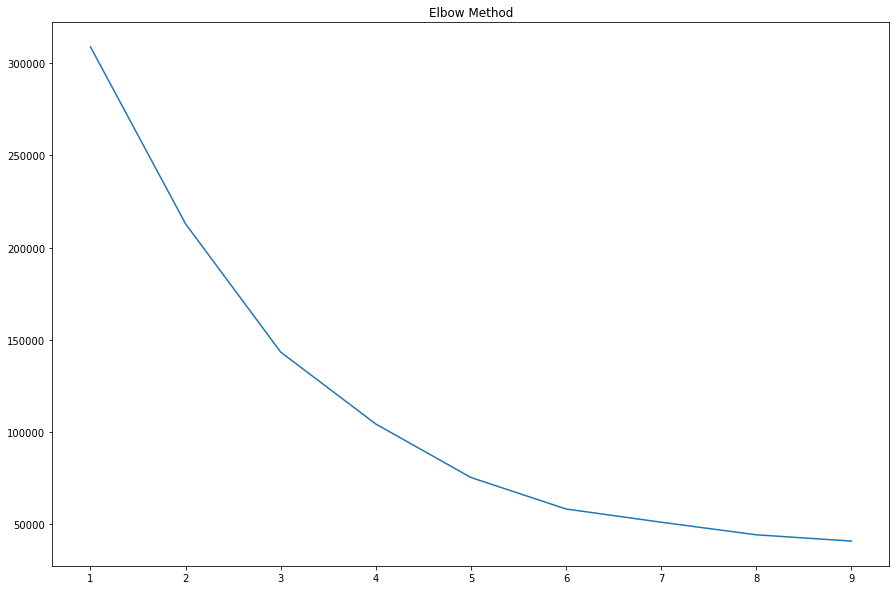

In [66]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1,10):
    kms= KMeans(n_clusters=i).fit(df)
    inertia.append(kms.inertia_)

fig, ax = plt.subplots(figsize=(15,10))

sns.lineplot(x=list(range(1,10)),y=inertia, ax=ax)
ax.set_title('Elbow Method')

plt.show()


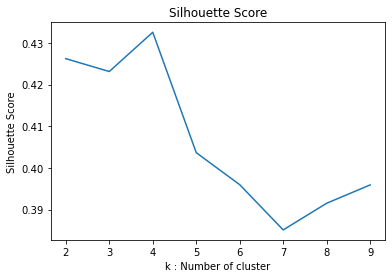

In [79]:
from sklearn.metrics import silhouette_score
sil_list=[]
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df[['Age','Annual Income (k$)']])
    labels = kmeans.labels_
    sil_list.append(silhouette_score(df[['Age','Annual Income (k$)']], labels, metric = 'euclidean'))
sns.lineplot(x = range(2,10), y = sil_list)
plt.title('Silhouette Score')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

Seems to be 5!

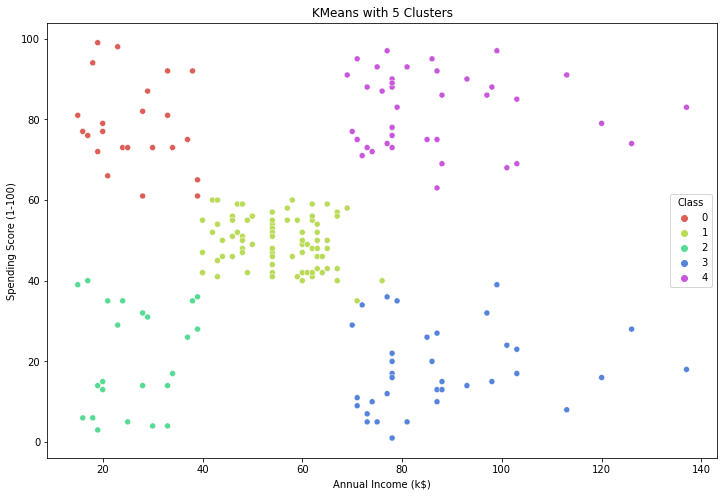

In [67]:
km5 = KMeans(n_clusters=5).fit(df)

df['Class'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=df['Class'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

0번 클러스터: Annual Income 중반대, Spending Score 중반


1번 클러스터: Annual Income 낮음, Spending Score 높음


2번 클러스터: Annual Income 높음, Spending Score 낮음 => 공략의 여지가 남아있으므로 이쪽을 타게팅하는 것이 바람직


3번 클러스터: Annual Income 낮음, Spending Score 낮음


4번 클러스터: Annual Income 높음, Spending Score 높음


Test

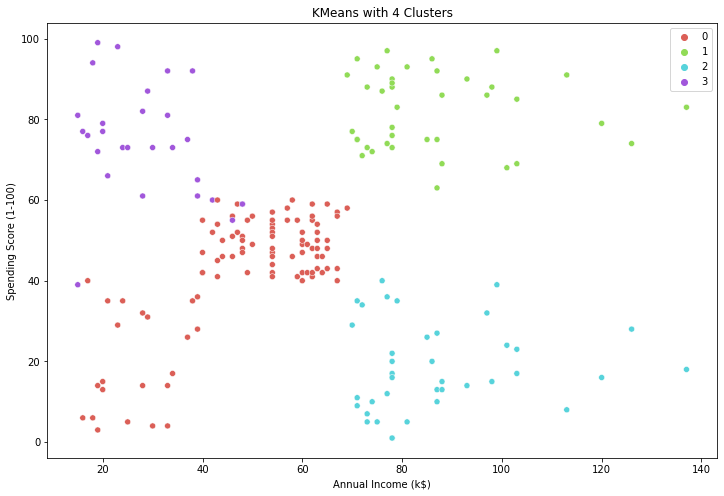

In [81]:
km6 = KMeans(n_clusters=4).fit(df)

plt.figure(1, figsize=(12, 8))
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=km6.labels_, 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()